# Transformada de Wavelet Discreta

A continuacion se presentara la transformada discreta de Wavelet

Antes de correr este programa asegurarse de tener instalado

Py Wavelets
## pip install PyWavelets

Fuentes:

https://scikit-image.org/docs/0.12.x/api/skimage.measure.html#skimage.measure.compare_mse

https://pywavelets.readthedocs.io/en/latest/ref/dwt-coefficient-handling.html

In [2]:
import numpy as np
import pywt 
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis
from skimage import io, color
from skimage.measure import compare_psnr, compare_nrmse
from numpy.testing import assert_array_almost_equal
import sys

In [45]:
def graf_P(name):
    data = io.imread(name)
    x = color.rgb2gray(data)
    shape = x.shape
    
    fig, axes = plt. subplots(2,2, figsize= [14,8])
    
    axes[0,0].imshow(x, cmap=plt.cm.gray)
    axes[0,0].set_title("Image")
    axes[0,0].set_axis_off()
    
    draw_2d_wp_basis(shape, wavedec2_keys(3), ax=axes[0, 1],
                     label_levels=3)
    axes[0, 1].set_title('{} level\ndecomposition'.format(3))
    coeffs = pywt.wavedecn(x, wavelet='db2', level=3)
    arr, coeff_slices, coeff_shapes = pywt.ravel_coeffs(coeffs)
    
    c=pywt.wavedec2(x, 'db2', mode= "zero", level=3)
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(3):
        c[detail_level +1] =[d/np.abs(d).max() for d in c[detail_level + 1]]
    arrL, slicesL = pywt.coeffs_to_array(c)
    
    axes[1, 1].imshow(arrL, cmap=plt.cm.gray)
    axes[1, 1].set_title('Coefficients\n({} level)'.format(3))
    axes[1, 1].set_axis_off()
    x_recon = ReconstructDWT(arr, coeff_slices, coeff_shapes)
    axes[1,0].imshow(x_recon, cmap=plt.cm.gray)
    axes[1,0].set_title('Inverse {}'.format(name))
    axes[1,0].set_axis_off()
    return x, x_recon


In [46]:
def ReconstructDWT(arr, coeff_slices, coeff_shapes):
    coeffs_from_arr = pywt.unravel_coeffs(arr, coeff_slices, coeff_shapes,
                                          output_format='wavedecn')
    x_recon = pywt.waverecn(coeffs_from_arr, wavelet='db2')
    #assert_array_almost_equal(x, x_recon)    para observar el error
    return x_recon

In [47]:
def TestingDWT(name):
    x, x_recon = graf_P(name)
    mse = compare_nrmse(x, x_recon)
    psnr = compare_psnr(x, x_recon)
    return mse, psnr

C:\Users\Usuario\Anaconda3\lib\site-packages\skimage\measure\simple_metrics.py:133: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  warn("Inputs have mismatched dtype.  Setting data_range based on "


lena.png,6.346086366197278e-16,314.3646871731675


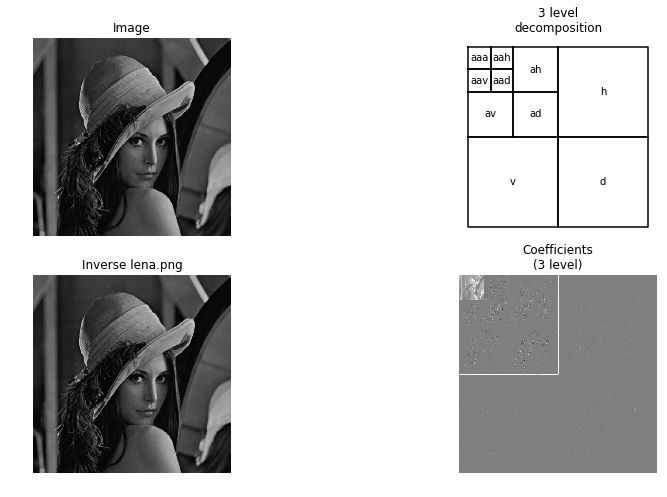

In [48]:
if __name__ == "__main__":
    name = "lena.png"
    mse, psnr = TestingDWT(name)
    data = "{},{},{}".format(name, mse, psnr)
    print (data)

In [14]:
name = "lena.png"
data = io.imread(name)
data = color.rgb2gray(data)    
coeffs = pywt.wavedecn(data, wavelet='db2', level=3)
arr, coeff_slices, coeff_shapes = pywt.ravel_coeffs(coeffs)
coeffs_from_arr = pywt.unravel_coeffs(arr, coeff_slices, coeff_shapes,
                                      output_format='wavedecn')
cam_recon = pywt.waverecn(coeffs_from_arr, wavelet='db2')
assert_array_almost_equal(data, cam_recon)
